In [35]:
import API.ai_ask
import API.neo4j_SLPC
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
neo4j_host=API.neo4j_SLPC.Neo4jClient(driver=API.neo4j_SLPC.local_driver)

from tqdm import tqdm

In [37]:
batch_size=100
skip=0

has_supply_section=[]

for i in tqdm(range(40)):
    has_supply_section_temp=neo4j_host.execute_query(query='''
        match ()-[r:SupplyProductTo]->() where r.verified=true
        with r.reference_section as s_id
        match (s:Section) where elementid(s)=s_id
        return distinct s_id, s.content as s_content
        skip $skip limit $batch_size 
    ''', parameters={"batch_size": batch_size, "skip": skip})
    has_supply_section+=[dict(i) for i in  has_supply_section_temp]
    skip+=1

100%|██████████| 40/40 [00:01<00:00, 33.22it/s]


In [42]:
# jb.dump(has_supply_section, r"DataSet\has_supply_section.jb")
has_supply_section_online=jb.load(r"DataSet\has_supply_section.jb")

260


(array([  62.,   97., 4478.,  510.,   56.,  147.,  795.,   33.,    0.,
          22.]),
 array([  70.,  216.,  362.,  508.,  654.,  800.,  946., 1092., 1238.,
        1384., 1530.]),
 <BarContainer object of 10 artists>)

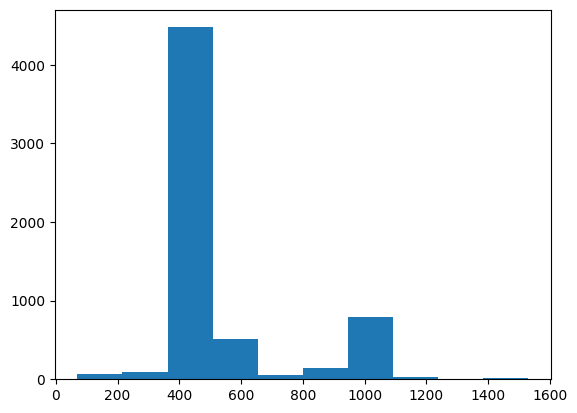

In [45]:
length_stat=[]
content_list=[]
for i in has_supply_section+has_supply_section_online:
    content_list.append(i["s_content"])
    length_stat.append(len(i["s_content"]))
    
print(len(set(content_list)))
plt.hist(length_stat)

In [36]:
neo4j_host.execute_query(query='''
        match ()-[r:SupplyProductTo]->() where r.verified=true
        with r.reference_section as s_id
        match (s:Section) where elementid(s)=s_id
        return count(distinct s_id)
    ''')

[<Record count(distinct s_id)=3964>]